In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install dill

In [ ]:
pip install scikeras

# Modelado

In [4]:
#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Operación sobre datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Apis principales
import tensorflow as tf
from tensorflow import keras

#Modelos
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc


#Capas
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense




In [5]:
# Carga de datos
path = '/content/drive/MyDrive/Colab Notebooks/Analítica Computacional/Proyecto 2/data.xls'
df = pd.read_excel(path, header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# Seleccionar la primera columna y las columnas a partir de la sexta en adelante
df_copy = df.iloc[:, [1] + list(range(6, len(df.columns)))].copy()
df_copy.head()


,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#Ajustar valores negativos a 0
columnas_a_reemplazar = df_copy.columns[1:7]
df_copy[columnas_a_reemplazar] = df_copy[columnas_a_reemplazar].apply(lambda x: x.mask(x < 0, 0))
df_copy.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# División en muestra de Train y Test

In [9]:
# Dividir los datos en X (características) y Y (objetivo)
X = df_copy.drop('default payment next month', axis=1)
Y = df_copy['default payment next month']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de Y_train:", Y_train.shape)
print("Dimensiones de Y_test:", Y_test.shape)

Dimensiones de X_train: (24000, 19)
Dimensiones de X_test: (6000, 19)
Dimensiones de Y_train: (24000,)
Dimensiones de Y_test: (6000,)


# Escalamiento de Variables

In [10]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar el escalado solo en las características de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# No olvides aplicar el mismo escalado a los datos de prueba
X_test_scaled = scaler.transform(X_test)

# PCA

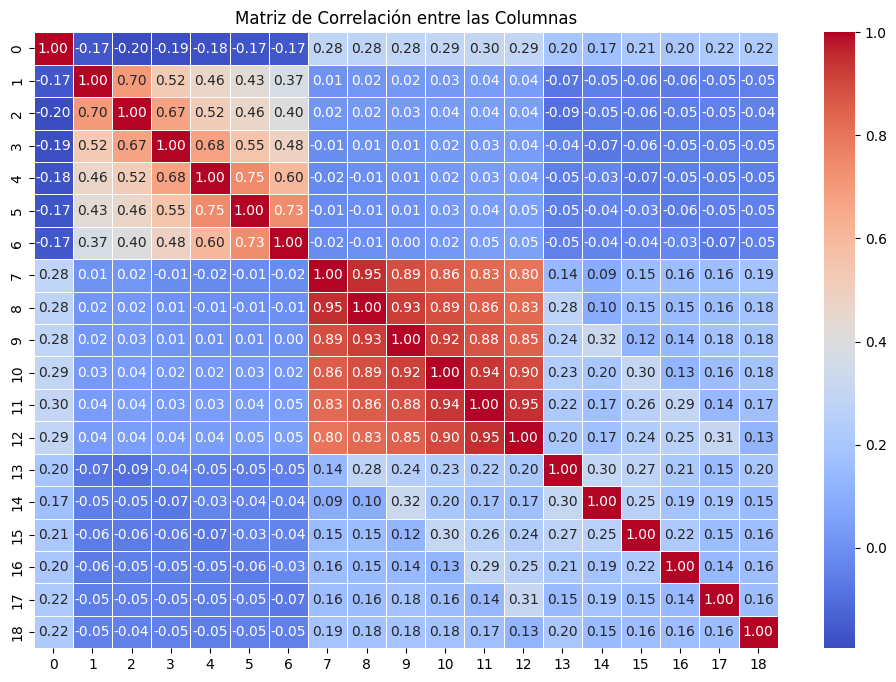

In [11]:
# Convertir el array de NumPy a DataFrame de Pandas
X_train_scaled_df = pd.DataFrame(X_train_scaled)

# Calcular la matriz de correlación
correlation_matrix = X_train_scaled_df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre las Columnas')
plt.show()

In [12]:
# Definir el número de componentes principales (ejemplo: cantidad de características - 1)
num_components = X_train_scaled.shape[1] - 1
num_components = 9

# Inicializar PCA con el número de componentes deseados
pca = PCA(n_components=num_components)

# Ajustar PCA al conjunto de entrenamiento y transformar tanto el conjunto de entrenamiento como el de prueba
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA realizado correctamente sobre el conjunto de train y de test")

PCA realizado correctamente sobre el conjunto de train y de test


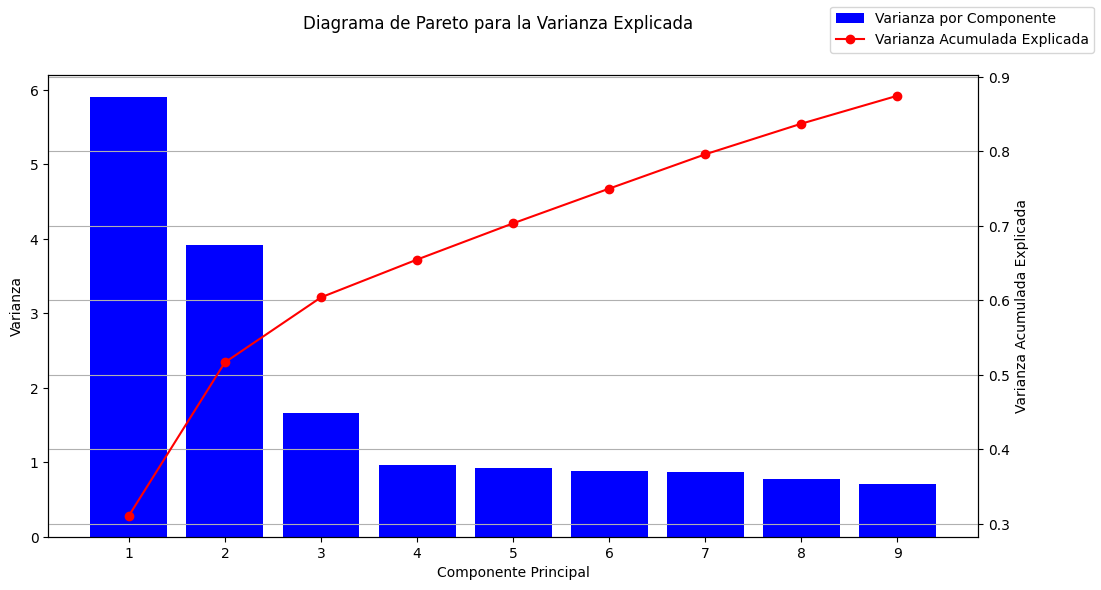

In [13]:
# Obtener las varianzas de los componentes principales
variance = pca.explained_variance_

# Calcular el porcentaje acumulado de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Diagrama de Pareto para la Varianza Explicada
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear el primer eje y graficar la varianza por componente
ax1.bar(range(1, len(variance) + 1), variance, align='center', label='Varianza por Componente', color='blue')
ax1.set_xlabel('Componente Principal')
ax1.set_ylabel('Varianza')
ax1.set_xticks(range(1, len(variance) + 1))

# Crear el segundo eje y graficar la varianza acumulada
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='red', label='Varianza Acumulada Explicada')
ax2.set_ylabel('Varianza Acumulada Explicada')

# Agregar leyendas y mostrar el gráfico
fig.suptitle('Diagrama de Pareto para la Varianza Explicada')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

# Variables para el modelo

In [14]:
#SI DECIDO USAR X ESCALADA
X_model_train = X_train_scaled
X_model_test = X_test_scaled

In [ ]:
#SI DECIDO USAR X PCA
X_model_train = X_train_pca
X_model_test = X_test_pca

# Red Densa

In [15]:
# Limpiar la sesión de Keras y establecer la semilla aleatoria
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [80]:
# Definir los parámetros de optimización
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epocas = 20
tam_lote = 32
dropout = 0.1

#Definir una función para programar la tasa de aprendizaje
def lr_scheduler(epoch, lr):
    return lr * 0.97

# Definir la devolución de llamada EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Definir la devolución de llamada LearningRateScheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Compilar el modelo con los parámetros personalizados de Adam
optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2)


## Apilada

In [17]:
# Crear el modelo apilado
modelo_apilado = Sequential()


In [18]:
# Añadir capas densas al modelo
modelo_apilado.add(Dense(X_model_train.shape[1], input_shape=(X_model_train.shape[1],), activation='relu'))
modelo_apilado.add(Dense(X_model_train.shape[1], activation='relu'))
modelo_apilado.add(Dense(X_model_train.shape[1], activation='relu'))
modelo_apilado.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
modelo_apilado.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,160 (4.53 KB)

 Trainable params: 1,160 (4.53 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
modelo_apilado.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Entrenar el modelo con la devolución de llamada EarlyStopping
history_modelo_apilado = modelo_apilado.fit(X_model_train, Y_train, epochs=20, batch_size=32, validation_data=(X_model_test, Y_test), callbacks=[lr_scheduler_callback,early_stopping])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8100 - loss: 0.4547 - val_accuracy: 0.8178 - val_loss: 0.4425 - learning_rate: 0.0097
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8172 - loss: 0.4353 - val_accuracy: 0.8165 - val_loss: 0.4451 - learning_rate: 0.0094
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8180 - loss: 0.4318 - val_accuracy: 0.8112 - val_loss: 0.4468 - learning_rate: 0.0091
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8175 - loss: 0.4327 - val_accuracy: 0.8178 - val_loss: 0.4441 - learning_rate: 0.0089
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8164 - loss: 0.4309 - val_accuracy: 0.8193 - val_loss: 0.4408 - learning_rate: 0.0086
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8182 - loss: 0.4280 - val_accuracy: 0.8183 - val_loss: 0.4445 - learning_rate: 0.0083
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8177 - loss: 0.4286 -

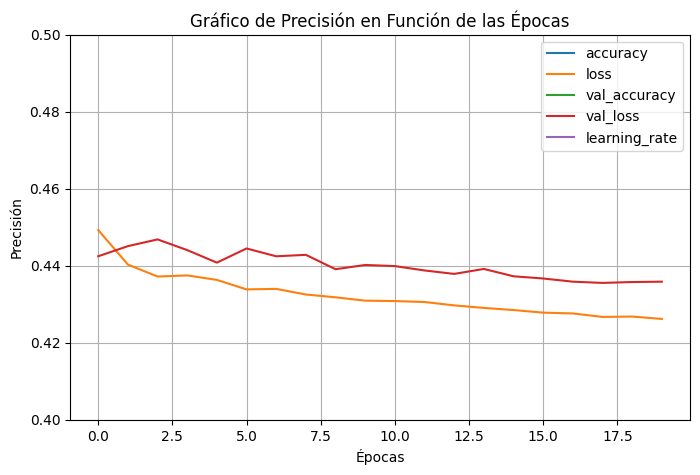

In [21]:
pd.DataFrame(history_modelo_apilado.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.4,0.5)
plt.show()

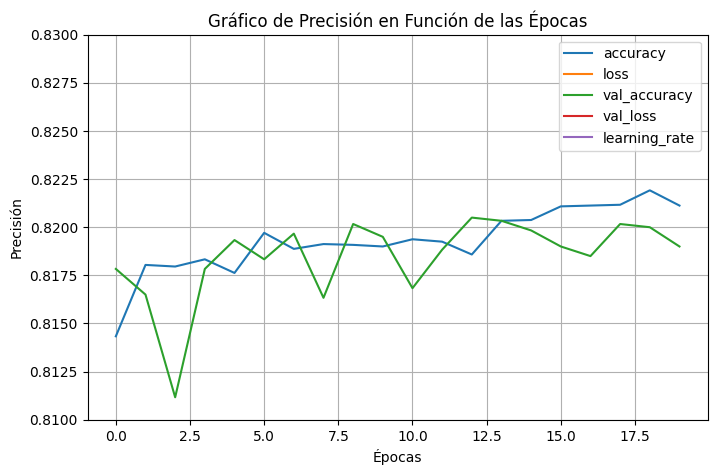

In [22]:
pd.DataFrame(history_modelo_apilado.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.81,0.83)
plt.show()

### Pipeline

In [89]:
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
import dill

# Definir los parámetros de optimización
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epocas = 20
tam_lote = 32
dropout = 0.1

#Definir una función para programar la tasa de aprendizaje
def lr_scheduler(epoch, lr):
    return lr * 0.97

# Definir la devolución de llamada EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Definir la devolución de llamada LearningRateScheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Crear el modelo
def crear_modelo():
    modelo_apilado = Sequential([
        Dense(X_model_train.shape[1], input_shape=(19,), activation='relu'),
        Dense(X_model_train.shape[1], activation='relu'),
        Dense(X_model_train.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
    modelo_apilado.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return modelo_apilado

# Crear el pipeline con pasos explícitos
pipeline_apilado = Pipeline([
    ('scaler', StandardScaler()),
    ('keras_clf', KerasClassifier(build_fn=crear_modelo, epochs=20, batch_size=32, verbose=0, callbacks=[lr_scheduler_callback, early_stopping]))
])


In [90]:
# Entrenar el pipeline
pipeline_apilado.fit(X_train, Y_train)
# Guardar el pipeline
with open('pipeline_apilado.pkl', 'wb') as f:
    dill.dump(pipeline_apilado, f)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


In [91]:
#Prediccion
# Cargar el pipeline
with open('pipeline_apilado.pkl', 'rb') as f:
    pipeline_cargado_apilado = dill.load(f)
#Prediccion
apilado_prediction = pipeline_cargado_apilado.predict(X_test)
acuraccy = accuracy_score(Y_test, apilado_prediction)
print("Accuracy promedio del pipeline:", acuraccy)

Accuracy promedio del pipeline: 0.8186666666666667


## Goteo

In [23]:
# Crear el modelo apilado
modelo_goteo = Sequential()

In [24]:

# Añadir capas densas al modelo con Dropout
modelo_goteo.add(Dense(X_model_train.shape[1], input_shape=(X_model_train.shape[1],), activation='relu'))
modelo_goteo.add(Dropout(dropout))

modelo_goteo.add(Dense(X_model_train.shape[1], activation='relu'))
modelo_goteo.add(Dropout(dropout))

modelo_goteo.add(Dense(X_model_train.shape[1], activation='relu'))
modelo_goteo.add(Dropout(dropout))

modelo_goteo.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
modelo_goteo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,160 (4.53 KB)

 Trainable params: 1,160 (4.53 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
modelo_goteo.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Entrenar el modelo con la devolución de llamada EarlyStopping
history_modelo_goteo = modelo_goteo.fit(X_model_train, Y_train, epochs=20, batch_size=32, validation_data=(X_model_test, Y_test), callbacks=[lr_scheduler_callback,early_stopping])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8030 - loss: 0.4665 - val_accuracy: 0.8193 - val_loss: 0.4406 - learning_rate: 0.0097
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8132 - loss: 0.4442 - val_accuracy: 0.8190 - val_loss: 0.4431 - learning_rate: 0.0094
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8118 - loss: 0.4424 - val_accuracy: 0.8175 - val_loss: 0.4391 - learning_rate: 0.0091
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8128 - loss: 0.4420 - val_accuracy: 0.8153 - val_loss: 0.4426 - learning_rate: 0.0089
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8125 - loss: 0.4378 - val_accuracy: 0.8155 - val_loss: 0.4380 - learning_rate: 0.0086
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8122 - loss: 0.4376 - val_accuracy: 0.8158 - val_loss: 0.4370 - learning_rate: 0.0083
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8133 - loss: 0.4366 -

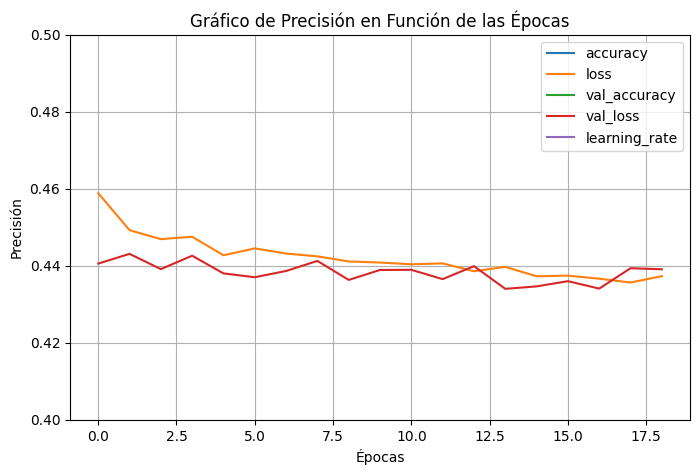

In [29]:
pd.DataFrame(history_modelo_goteo.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.4,0.5)
plt.show()

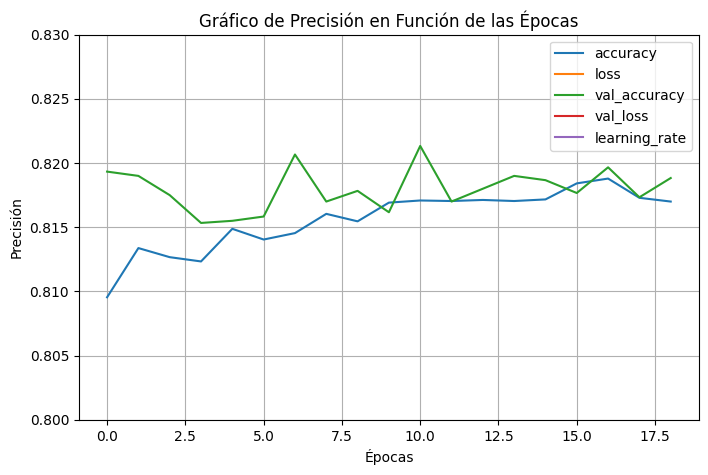

In [30]:
pd.DataFrame(history_modelo_goteo.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.8,0.83)
plt.show()

### Pipeline

In [92]:
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
import dill

# Definir los parámetros de optimización
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epocas = 20
tam_lote = 32
dropout = 0.1

#Definir una función para programar la tasa de aprendizaje
def lr_scheduler(epoch, lr):
    return lr * 0.97

# Definir la devolución de llamada EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Definir la devolución de llamada LearningRateScheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Crear el modelo
def crear_modelo():
    modelo = Sequential([
        Dense(X_model_train.shape[1], input_shape=(19,), activation='relu'),
        Dropout(0.1),
        Dense(X_model_train.shape[1], activation='relu'),
        Dropout(0.1),
        Dense(X_model_train.shape[1], activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
    modelo.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return modelo

# Crear el pipeline con pasos explícitos
pipeline_goteo = Pipeline([
    ('scaler', StandardScaler()),
    ('keras_clf', KerasClassifier(build_fn=crear_modelo, epochs=20, batch_size=32, verbose=0, callbacks=[lr_scheduler_callback, early_stopping]))
])


In [93]:
# Entrenar el pipeline
pipeline_goteo.fit(X_train, Y_train)
# Guardar el pipeline
with open('pipeline_goteo.pkl', 'wb') as f:
    dill.dump(pipeline_goteo, f)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


In [94]:
#Prediccion
# Cargar el pipeline
with open('pipeline_goteo.pkl', 'rb') as f:
    pipeline_cargado_goteo = dill.load(f)
#Prediccion
apilado_prediction = pipeline_cargado_goteo.predict(X_test)
acuraccy = accuracy_score(Y_test, apilado_prediction)
print("Accuracy promedio del pipeline:", acuraccy)

Accuracy promedio del pipeline: 0.8185


## Pirámide

In [51]:
# Crear el modelo apilado
modelo_piramide = Sequential()

In [53]:
#modelo_piramide.add(Dropout(dropout))

# Añadir capas densas al modelo con Dropout
modelo_piramide.add(Dense(X_model_train.shape[1], input_shape=(X_model_train.shape[1],), activation='relu'))
modelo_piramide.add(Dense(10, activation='relu'))
modelo_piramide.add(Dense(5, activation='relu'))
modelo_piramide.add(Dense(1, activation='sigmoid'))


In [54]:
modelo_piramide.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
modelo_piramide.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Entrenar el modelo con la devolución de llamada EarlyStopping
history_modelo_piramide = modelo_piramide.fit(X_model_train, Y_train, epochs=20, batch_size=32, validation_data=(X_model_test, Y_test), callbacks=[lr_scheduler_callback,early_stopping])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7882 - loss: 0.4814 - val_accuracy: 0.8173 - val_loss: 0.4404 - learning_rate: 0.0097
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8169 - loss: 0.4344 - val_accuracy: 0.8190 - val_loss: 0.4382 - learning_rate: 0.0094
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8171 - loss: 0.4315 - val_accuracy: 0.8198 - val_loss: 0.4388 - learning_rate: 0.0091
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8175 - loss: 0.4301 - val_accuracy: 0.8208 - val_loss: 0.4374 - learning_rate: 0.0089
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8186 - loss: 0.4284 - val_accuracy: 0.8188 - val_loss: 0.4358 - learning_rate: 0.0086
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8172 - loss: 0.4270 - val_accuracy: 0.8197 - val_loss: 0.4365 - learning_rate: 0.0083
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8174 - loss: 0.4261 - 

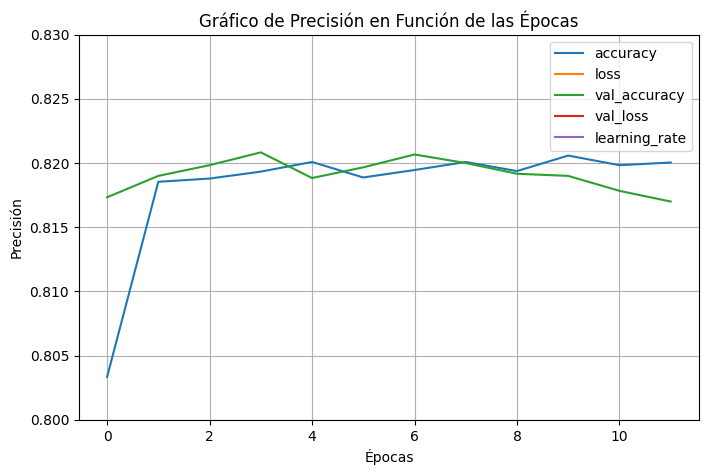

In [57]:
pd.DataFrame(history_modelo_piramide.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.8,0.83)
plt.show()

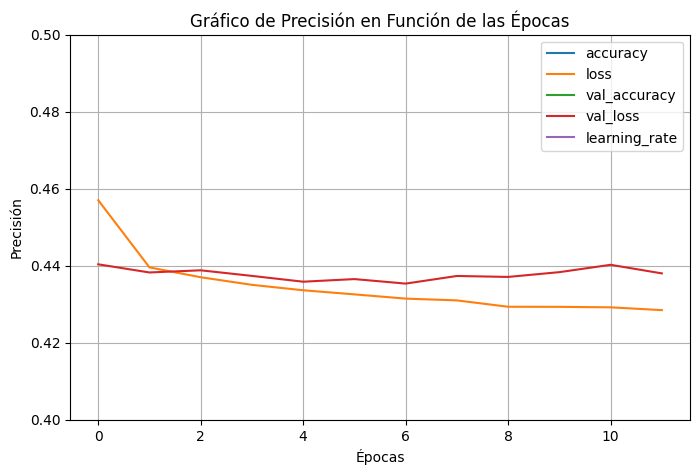

In [58]:
pd.DataFrame(history_modelo_piramide.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.4,0.5)
plt.show()

### Pipeline

In [95]:
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
import dill

# Definir los parámetros de optimización
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epocas = 20
tam_lote = 32
dropout = 0.1

#Definir una función para programar la tasa de aprendizaje
def lr_scheduler(epoch, lr):
    return lr * 0.97

# Definir la devolución de llamada EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Definir la devolución de llamada LearningRateScheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Crear el modelo
def crear_modelo():
    modelo = Sequential([
        Dense(19, input_shape=(19,), activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
    modelo.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return modelo

# Crear el pipeline con pasos explícitos
pipeline_piramide = Pipeline([
    ('scaler', StandardScaler()),
    ('keras_clf', KerasClassifier(build_fn=crear_modelo, epochs=20, batch_size=32, verbose=0, callbacks=[lr_scheduler_callback, early_stopping]))
])


In [96]:
# Entrenar el pipeline
pipeline_piramide.fit(X_train, Y_train)
# Guardar el pipeline
with open('pipeline_piramide.pkl', 'wb') as f:
    dill.dump(pipeline_piramide, f)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


In [97]:
#Prediccion
# Cargar el pipeline
with open('pipeline_piramide.pkl', 'rb') as f:
    pipeline_cargado_piramide = dill.load(f)
#Prediccion
apilado_prediction = pipeline_cargado_piramide.predict(X_test)
acuraccy = accuracy_score(Y_test, apilado_prediction)
print("Accuracy promedio del pipeline:", acuraccy)

Accuracy promedio del pipeline: 0.8175


## Pirámide Inversa

In [64]:
# Crear el modelo apilado
modelo_piramide_inv = Sequential()

In [65]:
#modelo_piramide.add(Dropout(dropout))

# Añadir capas densas al modelo con Dropout
modelo_piramide_inv.add(Dense(5, input_shape=(X_model_train.shape[1],), activation='relu'))
modelo_piramide_inv.add(Dense(10, activation='relu'))
modelo_piramide_inv.add(Dense(round(X_model_train.shape[1],0), activation='relu'))
modelo_piramide_inv.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
modelo_piramide_inv.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 5)                   │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 19)                  │             209 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 389 (1.52 KB)

 Trainable params: 389 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
modelo_piramide_inv.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Entrenar el modelo con la devolución de llamada EarlyStopping
history_modelo_piramide_inv = modelo_piramide_inv.fit(X_model_train, Y_train, epochs=20, batch_size=32, validation_data=(X_model_test, Y_test), callbacks=[lr_scheduler_callback,early_stopping])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8088 - loss: 0.4624 - val_accuracy: 0.8167 - val_loss: 0.4402 - learning_rate: 0.0097
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8168 - loss: 0.4352 - val_accuracy: 0.8172 - val_loss: 0.4393 - learning_rate: 0.0094
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8182 - loss: 0.4326 - val_accuracy: 0.8183 - val_loss: 0.4396 - learning_rate: 0.0091
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8193 - loss: 0.4317 - val_accuracy: 0.8152 - val_loss: 0.4411 - learning_rate: 0.0089
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8195 - loss: 0.4302 - val_accuracy: 0.8178 - val_loss: 0.4414 - learning_rate: 0.0086
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8196 - loss: 0.4293 - val_accuracy: 0.8200 - val_loss: 0.4409 - learning_rate: 0.0083
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8177 - loss: 0.4284 - 

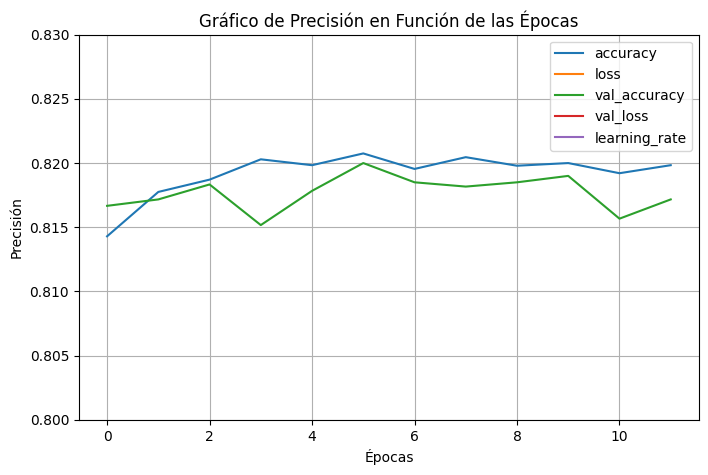

In [70]:
pd.DataFrame(history_modelo_piramide_inv.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.8,0.83)
plt.show()

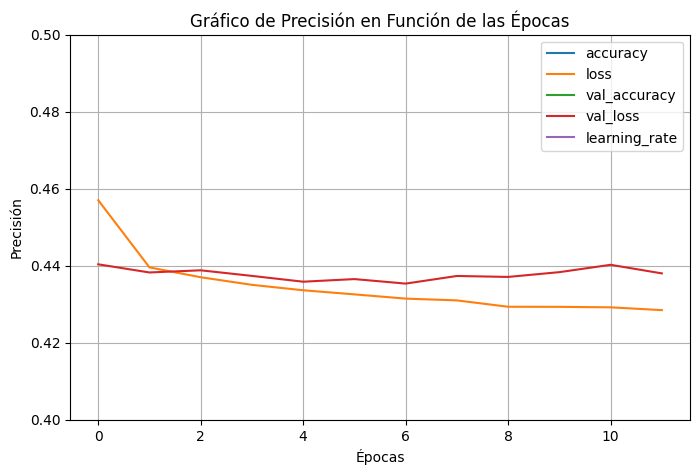

In [71]:
pd.DataFrame(history_modelo_piramide.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.4,0.5)
plt.show()

### Pipeline

In [99]:
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
import dill

# Definir los parámetros de optimización
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epocas = 20
tam_lote = 32
dropout = 0.1

#Definir una función para programar la tasa de aprendizaje
def lr_scheduler(epoch, lr):
    return lr * 0.97

# Definir la devolución de llamada EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Definir la devolución de llamada LearningRateScheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Crear el modelo
def crear_modelo():
    modelo = Sequential([
        Dense(5, input_shape=(19,), activation='relu'),
        Dense(10, activation='relu'),
        Dense(19, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
    modelo.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return modelo

# Crear el pipeline con pasos explícitos
pipeline_piramide_inv = Pipeline([
    ('scaler', StandardScaler()),
    ('keras_clf', KerasClassifier(build_fn=crear_modelo, epochs=20, batch_size=32, verbose=0, callbacks=[lr_scheduler_callback, early_stopping]))
])


In [100]:
# Entrenar el pipeline
pipeline_piramide_inv.fit(X_model_train, Y_train)
# Guardar el pipeline
with open('pipeline_piramide_inv.pkl', 'wb') as f:
    dill.dump(pipeline_piramide_inv, f)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


In [101]:
#Prediccion
# Cargar el pipeline
with open('pipeline_piramide_inv.pkl', 'rb') as f:
    pipeline_cargado_piramide_inv = dill.load(f)
#Prediccion
apilado_prediction = pipeline_cargado_piramide_inv.predict(X_model_test)
acuraccy = accuracy_score(Y_test, apilado_prediction)
print("Accuracy promedio del pipeline:", acuraccy)

Accuracy promedio del pipeline: 0.82


## Convolucional

In [76]:
#Representación convolucional
# Supongamos que X_model_train es tu matriz de datos con dimensiones (n_filas, 19)
n_filas, _ = X_model_train.shape
n_filas_test, _ = X_model_test.shape
print(n_filas_test)
# Crear una matriz para almacenar las filas procesadas
X_processed_train = np.zeros((n_filas, 6, 4))
X_processed_test = np.zeros((n_filas_test, 6, 4))

# Procesar cada fila
for i in range(n_filas):
    # Primera columna: repetir el valor de la primera columna de la fila 6 veces
    X_processed_train[i, :, 0] = X_model_train[i, 0]

    # Segunda columna: valores de la columna 2 a 7
    X_processed_train[i, :, 1] = X_model_train[i, 1:7]

    # Tercera columna: valores de la columna 8 a 13
    X_processed_train[i, :, 2] = X_model_train[i, 7:13]

    # Cuarta columna: valores de la columna 14 a 19
    X_processed_train[i, :, 3] = X_model_train[i, 13:]

    if n_filas_test - 1 >= i:
      X_processed_test[i, :, 0] = X_model_test[i, 0]
      X_processed_test[i, :, 1] = X_model_test[i, 1:7]
      X_processed_test[i, :, 2] = X_model_test[i, 7:13]
      X_processed_test[i, :, 3] = X_model_test[i, 13:]

# Verificar la forma de la matriz resultante
print(X_processed_train.shape)
print(X_processed_test.shape)

6000
(24000, 6, 4)
(6000, 6, 4)


In [77]:
# Definir el modelo
modelo_conv = Sequential()

In [78]:
# Definir las dimensiones de la matriz de entrada
input_shape = (6, 4, 1)

# Agregar una capa convolucional
modelo_conv.add(Conv2D(32, kernel_size=(4, 3), activation='relu', input_shape=input_shape))

# Agregar una capa convolucional
modelo_conv.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))

# Aplanar los datos para la capa densa
modelo_conv.add(Flatten())

# Agregar la capa de salida binaria
modelo_conv.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
modelo_conv.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 3, 2, 32)            │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 2, 1, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,801 (34.38 KB)

 Trainable params: 8,801 (34.38 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
modelo_conv.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Entrenar el modelo con la devolución de llamada EarlyStopping
history_modelo_conv = modelo_conv.fit(X_processed_train, Y_train, epochs=epocas, batch_size=tam_lote, validation_data=(X_processed_test, Y_test), callbacks=[lr_scheduler_callback, early_stopping])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8050 - loss: 0.4628 - val_accuracy: 0.8170 - val_loss: 0.4469 - learning_rate: 0.0097
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8127 - loss: 0.4403 - val_accuracy: 0.8190 - val_loss: 0.4425 - learning_rate: 0.0094
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8158 - loss: 0.4355 - val_accuracy: 0.8178 - val_loss: 0.4392 - learning_rate: 0.0091
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8161 - loss: 0.4333 - val_accuracy: 0.8180 - val_loss: 0.4386 - learning_rate: 0.0089
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8170 - loss: 0.4303 - val_accuracy: 0.8183 - val_loss: 0.4368 - learning_rate: 0.0086
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8195 - loss: 0.4293 - val_accuracy: 0.8167 - val_loss: 0.4370 - learning_rate: 0.0083
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8182 - loss: 0.4291 - 

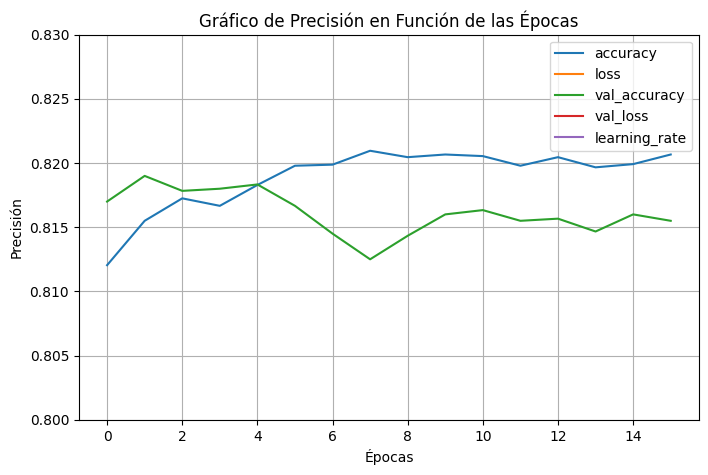

In [82]:
pd.DataFrame(history_modelo_conv.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.8,0.83)
plt.show()

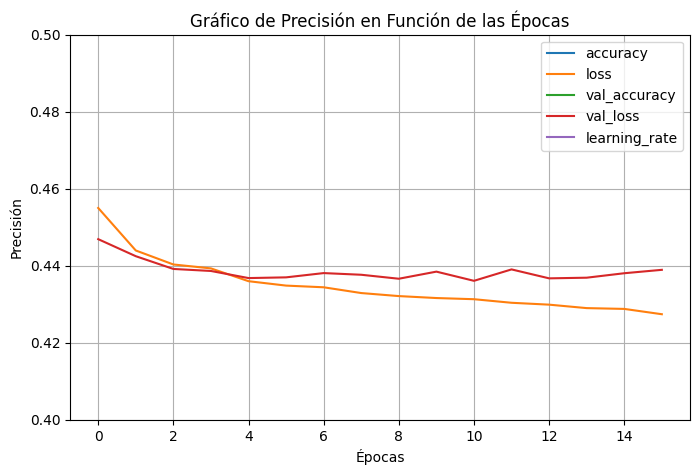

In [83]:
pd.DataFrame(history_modelo_conv.history).plot(figsize = (8,5))
# Agregar títulos y etiquetas de ejes
plt.title('Gráfico de Precisión en Función de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.gca().set_ylim(0.4,0.5)
plt.show()

### Pipeline

In [103]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def representacion_convolucional(X_for_process):
    # Supongamos que X_for_process es tu matriz de datos con dimensiones (n_filas, 19)
    n_filas, _ = X_for_process.shape

    # Crear una matriz para almacenar las filas procesadas
    X_processed = np.zeros((n_filas, 6, 4))

    # Procesar cada fila
    for i in range(n_filas):
        # Primera columna: repetir el valor de la primera columna de la fila 6 veces
        X_processed[i, :, 0] = X_for_process[i, 0]

        # Segunda columna: valores de la columna 2 a 7
        X_processed[i, :, 1] = X_for_process[i, 1:7]

        # Tercera columna: valores de la columna 8 a 13
        X_processed[i, :, 2] = X_for_process[i, 7:13]

        # Cuarta columna: valores de la columna 14 a 19
        X_processed[i, :, 3] = X_for_process[i, 13:]

    return X_processed

from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
import dill

# Definir los parámetros de optimización
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epocas = 20
tam_lote = 32
dropout = 0.1

#Definir una función para programar la tasa de aprendizaje
def lr_scheduler(epoch, lr):
    return lr * 0.97

# Definir la devolución de llamada EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Definir la devolución de llamada LearningRateScheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Crear el modelo
def crear_modelo():
    modelo = Sequential([
        Conv2D(32, kernel_size=(4, 3), activation='relu', input_shape=(6,4,1)),
        Conv2D(64, kernel_size=(2, 2), activation='relu'),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
    modelo.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return modelo

# Crear el pipeline con pasos explícitos
pipeline_conv = Pipeline([
    ('scaler', StandardScaler()),
    ('preprocess', FunctionTransformer(representacion_convolucional)),
    ('keras_clf', KerasClassifier(build_fn=crear_modelo, epochs=20, batch_size=32, verbose=0, callbacks=[lr_scheduler_callback, early_stopping]))
])


In [114]:
# Entrenar el pipeline
pipeline_conv.fit(X_train, Y_train)
# Guardar el pipeline
with open('pipeline_conv.pkl', 'wb') as f:
    dill.dump(pipeline_conv, f)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


In [113]:
#Prediccion
# Cargar el pipeline
with open('pipeline_conv.pkl', 'rb') as f:
    pipeline_cargado_conv = dill.load(f)
#Prediccion
apilado_prediction = pipeline_cargado_conv.predict(X_test)
acuraccy = accuracy_score(Y_test, apilado_prediction)
print("Accuracy promedio del pipeline:", acuraccy)

Accuracy promedio del pipeline: 0.8166666666666667


## Bagging

In [106]:
# Crear listas para almacenar las probabilidades de predicción de cada modelo
prob_predictions = []

# Obtener las probabilidades de predicción de cada modelo en el conjunto de test
for model in [modelo_apilado, modelo_goteo, modelo_piramide, modelo_piramide_inv]:
    prob_predictions.append(model.predict(X_model_test))

prob_predictions.append(modelo_conv.predict(X_processed_test))

# Calcular el promedio de las probabilidades de predicción de todos los modelos
average_proba_predictions = np.mean(prob_predictions, axis=0)

# Calcular el accuracy y el AUC promediando los resultados de todos los modelos
bagging_accuracy = accuracy_score(Y_test, np.round(average_proba_predictions))
bagging_auc = roc_auc_score(Y_test, average_proba_predictions)

print("Accuracy promedio del Bagging:", bagging_accuracy)
print("AUC promedio del Bagging:", bagging_auc)



188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy promedio del Bagging: 0.8201666666666667
AUC promedio del Bagging: 0.7770831021163203


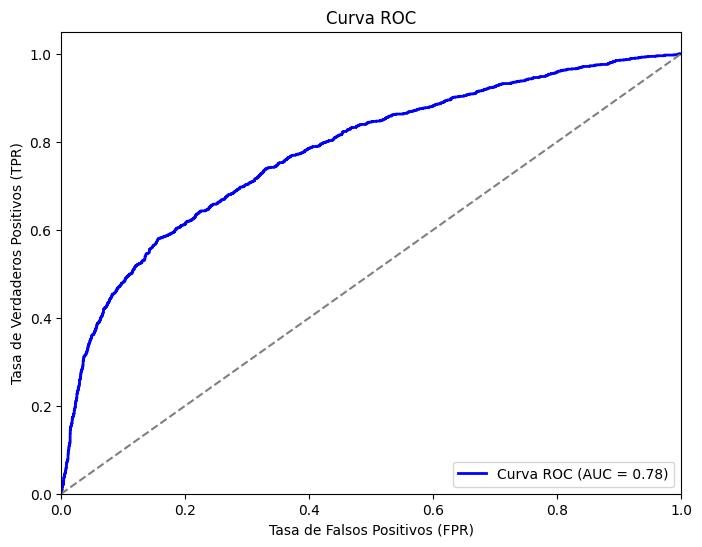

In [107]:
# Calcular la curva ROC para el Bagging
fpr, tpr, thresholds = roc_curve(Y_test, average_proba_predictions)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [108]:
# Crear una lista para almacenar los valores de accuracy
accuracies = []

# Probar diferentes umbrales
for threshold in thresholds:
    # Convertir las probabilidades de predicción en predicciones binarias utilizando el umbral actual
    binary_predictions = (average_proba_predictions >= threshold).astype(int)
    # Calcular el accuracy correspondiente al umbral actual
    accuracy = accuracy_score(Y_test, binary_predictions)
    # Almacenar el accuracy en la lista
    accuracies.append(accuracy)

# Encontrar el umbral que maximice el accuracy
optimal_threshold = thresholds[np.argmax(accuracies)]
max_accuracy = np.max(accuracies)

print("Umbral óptimo que maximiza el accuracy:", optimal_threshold)
print("Accuracy máximo correspondiente al umbral óptimo:", max_accuracy)


Umbral óptimo que maximiza el accuracy: 0.5341384
Accuracy máximo correspondiente al umbral óptimo: 0.8213333333333334


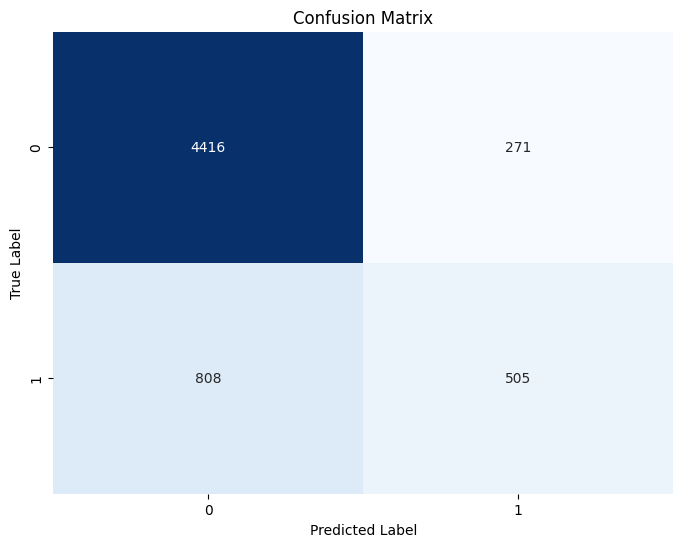

In [110]:
from sklearn.metrics import confusion_matrix

# Convertir las probabilidades en predicciones binarias usando un umbral de decisión de 0.5
binary_predictions = np.round(average_proba_predictions)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, binary_predictions)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()